In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\yenni\Downloads\train.csv"
data = pd.read_csv(file_path)

In [4]:
data.head()      #got to analyse the first 5 rows.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
testfile_path = r"C:\Users\yenni\Downloads\test.csv"
test_data = pd.read_csv(testfile_path)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
target = 'SalePrice'
X_train = data.drop(columns=[target]) 
y_train = data[target]
X_test = test_data

In [11]:
a = data.select_dtypes(include=['object', 'category']).columns
features = list(a)

In [12]:
b = data.select_dtypes(include=['object', 'category']).columns
test_features = list(b)

In [13]:
print(X_train.shape)
print(y_train.shape)

(1460, 80)
(1460,)


In [18]:
X_input = X_train.fillna(0)
results = y_train.fillna(0)
X_test_input = X_test.fillna(0)

In [19]:
X_train_0or1 = pd.get_dummies(X_input, columns=features)
X_test_0or1 = pd.get_dummies(X_test_input, columns=test_features)

In [ ]:
#but for scaling in test cases we must balance the extra columns due to new feature values.

In [23]:
extra_columns = set(X_train_0or1.columns) - set(X_test_0or1.columns)
extra_columns1 = set(X_test_0or1.columns) - set(X_train_0or1.columns)
X_train_0or1 =X_train_0or1.drop(columns=extra_columns)
X_test_0or1=X_test_0or1.drop(columns=extra_columns1)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_0or1)
X_test_scaled = scaler.transform(X_test_0or1)

## Using the knn model

In [27]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [28]:
knn_model.fit(X_train_scaled, results)

KNeighborsRegressor(n_neighbors=3)

In [30]:
y_hat = knn_model.predict(X_test_scaled)

In [31]:
y_hat

array([120633.33333333, 168166.66666667, 187666.66666667, ...,
       128833.33333333, 109833.33333333, 188966.66666667])

## Clustering

In [32]:
features = pd.get_dummies(X_input, columns=a)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\yenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yenni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


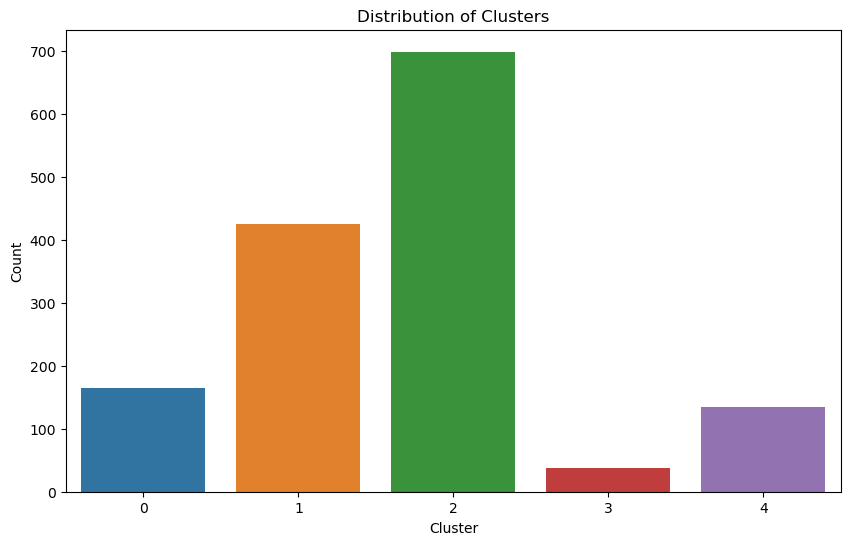

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()